In [2]:
#Analise dias da semana
#Analsie sobremesa
#intall 
!pip install seaborn==0.9.0

#Importando base de dados
import seaborn as sns
import pandas as pd
from scipy.stats import ranksums
dados = pd.read_csv('tips.csv')
#tradução
#buascar nomes das colunas
dados.columns

renomear = {
    'total_bill' : 'valor_da_conta',
    'tip':'gorjeta', 
    'dessert':'sobremesa', 
    'day':'dia_da_semana', 
    'time':'hora_do_dia', 
    'size':'total_de_pessoas'
}

gorjetas = dados.rename(columns = renomear)

#traduzir o conteudo 
#buscando o distinct da coluna
#gorjetas.sobremesa.unique()

#atribuindo um dicionario do que será alterado
sim_nao = {
    'No':'Não', 'Yes':'Sim'
}

#mapeando o campo e atualiando o dataframe
gorjetas.sobremesa = gorjetas.sobremesa.map(sim_nao)
dias = {
    'Sun' :'Domingo', 
    'Sat' :'Sabado', 
    'Thur':'Quinta', 
    'Fri' :'Sexta'
}

gorjetas.dia_da_semana = gorjetas.dia_da_semana.map(dias)

gorjetas.hora_do_dia.unique()
horadia = {
    'Dinner':'Jantar', 
    'Lunch':'Almoço'
}
gorjetas.hora_do_dia = gorjetas.hora_do_dia.map(horadia)

##criando campo porcentagem
gorjetas['porcentagem'] = gorjetas['gorjeta'] / gorjetas['valor_da_conta']
gorjetas.porcentagem = gorjetas.porcentagem.round(2)

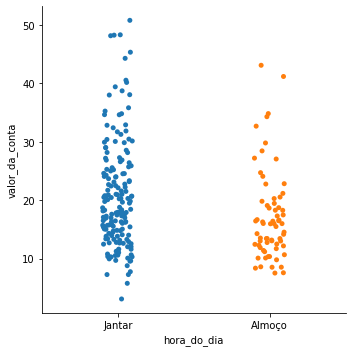

In [5]:
sns.catplot(x = 'hora_do_dia', y = 'valor_da_conta', data = gorjetas)

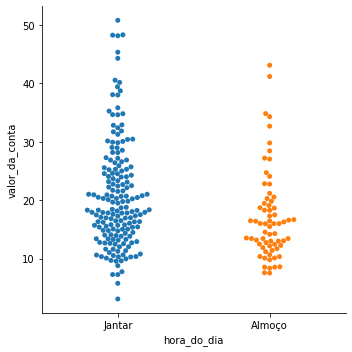

In [7]:
sns.catplot(x = 'hora_do_dia', y = 'valor_da_conta',kind = 'swarm', data = gorjetas)

<AxesSubplot:xlabel='hora_do_dia', ylabel='valor_da_conta'>

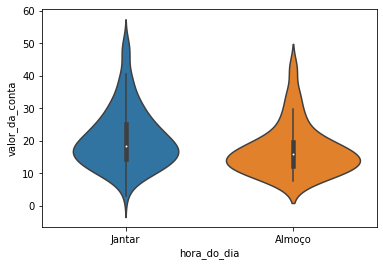

In [9]:
sns.violinplot(x = 'hora_do_dia', y = 'valor_da_conta', data = gorjetas)

<AxesSubplot:xlabel='hora_do_dia', ylabel='valor_da_conta'>

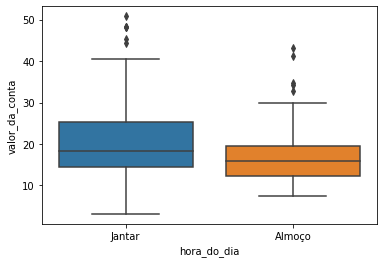

In [10]:
sns.boxplot(x = 'hora_do_dia', y = 'valor_da_conta', data = gorjetas)

<AxesSubplot:xlabel='valor_da_conta'>

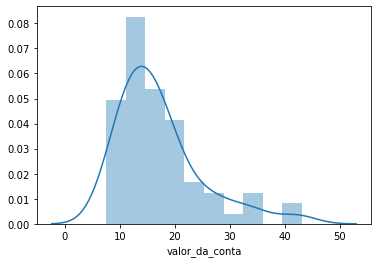

In [17]:
#No nosso caso, o eixo X é o valor da conta e o eixo Y é quantidade de vezes que aquele item aparece na distribuição.
almoco = gorjetas.query("hora_do_dia == 'Almoço'").valor_da_conta
sns.distplot(almoco)

<AxesSubplot:xlabel='valor_da_conta'>

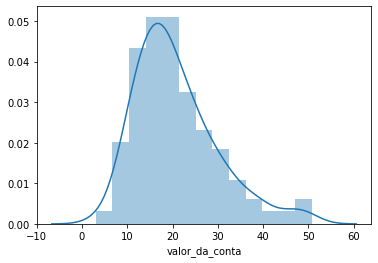

In [20]:
jantar = gorjetas.query("hora_do_dia == 'Jantar'").valor_da_conta
sns.distplot(jantar)

<AxesSubplot:xlabel='valor_da_conta'>

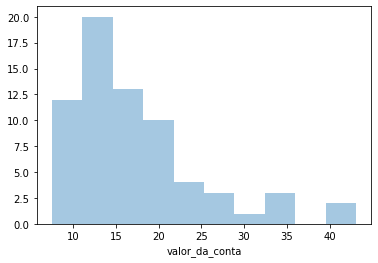

In [22]:
#Poderemos passar um parâmetro kde igual a False para visualizarmos um gráfico atrás deste último, facilitando nossa leitura.
sns.distplot(almoco, kde = False)

<AxesSubplot:xlabel='valor_da_conta'>

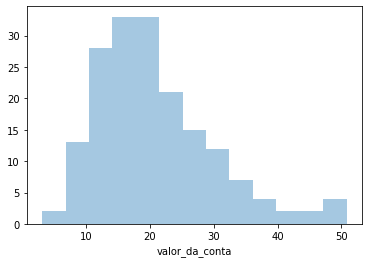

In [24]:
sns.distplot(jantar, kde = False)

In [28]:
gorjetas.groupby('hora_do_dia').mean()[['valor_da_conta','gorjeta','porcentagem']]

,valor_da_conta,gorjeta,porcentagem
hora_do_dia,,,
Almoço,17.168676,2.728088,0.163971
Jantar,20.797159,3.102670,0.159773


In [33]:
#teste de hipotese
# h null a distribuição do valor da conta é igual no jantar e no almoço
# h alt a distribuição do valor da conta nao é igual no jantar e no almoço
r3 = ranksums(jantar, almoco)

print ( 'o valor do p-velue é {}'.format(r3) )


o valor do p-velue é RanksumsResult(statistic=3.2438872807262955, pvalue=0.0011791039723641672)


In [38]:
#teste de hipotese
# h null a distribuição do taxa da gorjeta é igual no jantar e no almoço
# h alt a distribuição do taxa da gorjeta nao é igual no jantar e no almoço

porcentagem_almoco = gorjetas.query("hora_do_dia == 'Almoço'").porcentagem
porcentagem_jantar = gorjetas.query("hora_do_dia == 'Jantar'").porcentagem
r4 = ranksums(porcentagem_almoco, porcentagem_jantar)

print(' o valor da taxa da gorjeta é {}'.format(r4))

 o valor da taxa da gorjeta é RanksumsResult(statistic=1.1258018532735787, pvalue=0.2602493995587126)
